In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.holtwinters import SimpleExpSmoothing # SES
from statsmodels.tsa.holtwinters import Holt # Holts Exponential Smoothing
from statsmodels.tsa.holtwinters import ExponentialSmoothing  

In [2]:
cocacola=pd.read_excel("CocaCola_Sales_Rawdata.xlsx")
cocacola

,Quarter,Sales
0,Q1_86,1734.827000
1,Q2_86,2244.960999
2,Q3_86,2533.804993
3,Q4_86,2154.962997
4,Q1_87,1547.818996
5,Q2_87,2104.411995
6,Q3_87,2014.362999
7,Q4_87,1991.746998
8,Q1_88,1869.049999
9,Q2_88,2313.631996


In [3]:
cocacola['Month'] = (pd.to_datetime(cocacola['Quarter'].str.split('_').apply(lambda x: ''.join(x[::-1]))))

In [4]:
cocacola_data=cocacola.drop(["Quarter"],inplace=False,axis=1)

In [5]:
cocacola_data

,Sales,Month
0,1734.827000,2086-01-01
1,2244.960999,2086-04-01
2,2533.804993,2086-07-01
3,2154.962997,2086-10-01
4,1547.818996,2087-01-01
5,2104.411995,2087-04-01
6,2014.362999,2087-07-01
7,1991.746998,2087-10-01
8,1869.049999,2088-01-01
9,2313.631996,2088-04-01


<AxesSubplot:>

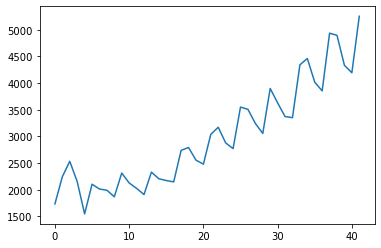

In [6]:
cocacola_data.Sales.plot() 

In [7]:
#Splitting data to test and train
Train = cocacola_data.head(30)
Test = cocacola_data.tail(12)  

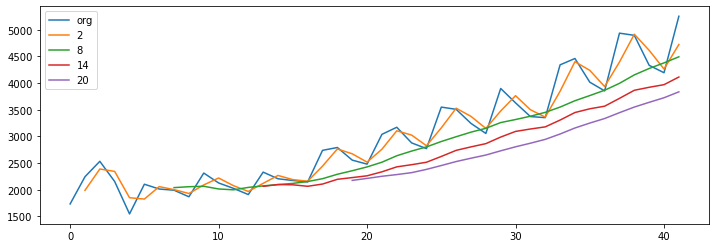

In [8]:
#Moving Average
plt.figure(figsize=(12,4))
cocacola_data.Sales.plot(label="org")
for i in range(2,24,6):
    cocacola_data["Sales"].rolling(i).mean().plot(label=str(i))
plt.legend(loc='best') 

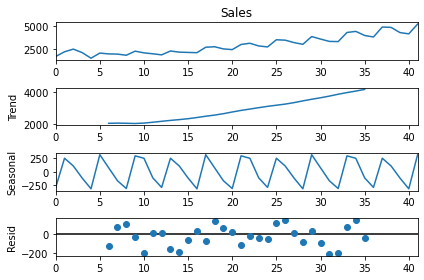

In [9]:
#Time series decomposition plot
decompose_ts_add = seasonal_decompose(cocacola_data.Sales,period=12)
decompose_ts_add.plot()
plt.show() 

In [10]:
#ACF and PACF plots

In [11]:
import statsmodels.graphics.tsaplots as tsa_plots

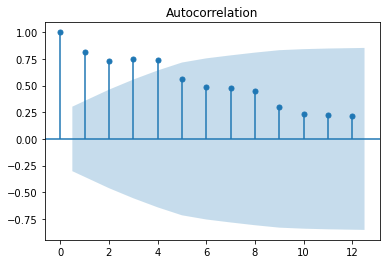

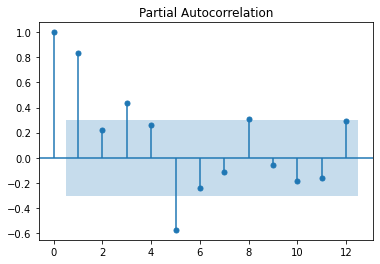

In [12]:
tsa_plots.plot_acf(cocacola_data.Sales,lags=12)
tsa_plots.plot_pacf(cocacola_data.Sales,lags=12)
plt.show() 

In [13]:
#Evaluation Metric MAPE
def MAPE(pred,org):
    temp = np.abs((pred-org)/org)*100
    return np.mean(temp) 

In [14]:
#Simple Exponential Method
Train["Sales"] = Train["Sales"].astype('double') 
ses_model = SimpleExpSmoothing(Train["Sales"]).fit(smoothing_level=0.2)
pred_ses = ses_model.predict(start = Test.index[0],end = Test.index[-1])
MAPE(pred_ses,Test.Sales)  

<ipython-input-14-79468fc3f2c6>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Train["Sales"] = Train["Sales"].astype('double')
C:\Users\Dr. Nitin\python\lib\site-packages\statsmodels\tsa\holtwinters\model.py:427: FutureWarning: After 0.13 initialization must be handled at model creation
  warnings.warn(


22.046763674416013

In [15]:
# Holt method 
hw_model = Holt(Train["Sales"]).fit(smoothing_level=0.8, smoothing_slope=0.2)
pred_hw = hw_model.predict(start = Test.index[0],end = Test.index[-1])
MAPE(pred_hw,Test.Sales) 

C:\Users\Dr. Nitin\python\lib\site-packages\statsmodels\tsa\holtwinters\model.py:427: FutureWarning: After 0.13 initialization must be handled at model creation
  warnings.warn(
<ipython-input-15-8b6f962a88ff>:2: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead
  hw_model = Holt(Train["Sales"]).fit(smoothing_level=0.8, smoothing_slope=0.2)


11.213842374364681

In [16]:
#Holts winter exponential smoothing with additive seasonality and additive trend
hwe_model_add_add = ExponentialSmoothing(Train["Sales"],seasonal="add",trend="add",seasonal_periods=12).fit() #add the trend to the model
pred_hwe_add_add = hwe_model_add_add.predict(start = Test.index[0],end = Test.index[-1])
MAPE(pred_hwe_add_add,Test.Sales) 

C:\Users\Dr. Nitin\python\lib\site-packages\statsmodels\tsa\holtwinters\model.py:427: FutureWarning: After 0.13 initialization must be handled at model creation
  warnings.warn(


8.049232899645991

In [17]:
#Holts winter exponential smoothing with multiplicative seasonality and additive trend
hwe_model_mul_add = ExponentialSmoothing(Train["Sales"],seasonal="mul",trend="add",seasonal_periods=12).fit() 
pred_hwe_mul_add = hwe_model_mul_add.predict(start = Test.index[0],end = Test.index[-1])
MAPE(pred_hwe_mul_add,Test.Sales) 

C:\Users\Dr. Nitin\python\lib\site-packages\statsmodels\tsa\holtwinters\model.py:427: FutureWarning: After 0.13 initialization must be handled at model creation
  warnings.warn(


4.7731141333539995

In [18]:
#Final model by combining test and train data
cocacola_data["Sales"] = cocacola_data["Sales"].astype('double')
hwe_model_mul_add = ExponentialSmoothing(cocacola_data["Sales"],seasonal="mul",trend="add",seasonal_periods=12).fit()   

C:\Users\Dr. Nitin\python\lib\site-packages\statsmodels\tsa\holtwinters\model.py:427: FutureWarning: After 0.13 initialization must be handled at model creation
  warnings.warn(


In [19]:
#Forecasting for next 10 time periods
hwe_model_mul_add.forecast(10)  

42    4909.543702
43    4568.441892
44    4500.749538
45    5699.870828
46    5740.743055
47    5134.342651
48    4881.347528
49    6144.868499
50    6014.706235
51    5430.914035
dtype: float64